In [2]:
%matplotlib inline
import random

import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [3]:
url = "https://uk.wikipedia.org/wiki/Народжуваність_в_Україні"
page_html = requests.get(url=url).text

In [4]:
tabs = pd.read_html(page_html, header=0)
df = tabs[-12]

In [5]:
# Task 1.1
df.head()

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
0,Автономна Республіка Крим,230.0,206.0,160.0,130,109,93,80,73,90,119,126,NaN
1,Вінницька область,224.0,192.0,142.0,124,119,107,103,84,90,108,112,109.0
2,Волинська область,247.0,250.0,179.0,153,150,137,125,112,119,148,148,141.0
3,Дніпропетровська область,204.0,204.0,151.0,123,106,92,80,71,89,110,112,111.0
4,Донецька область,271.0,214.0,140.0,109,94,82,70,61,76,98,98,82.0


In [6]:
# Task 1.2
df.shape

(28, 13)

In [7]:
# Task 1.3 (в таблиці вже вказані Nan, а не "-"
df

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
0,Автономна Республіка Крим,230.0,206.0,160.0,130,109,93,80,73,90,119,126,NaN
1,Вінницька область,224.0,192.0,142.0,124,119,107,103,84,90,108,112,109.0
2,Волинська область,247.0,250.0,179.0,153,150,137,125,112,119,148,148,141.0
3,Дніпропетровська область,204.0,204.0,151.0,123,106,92,80,71,89,110,112,111.0
4,Донецька область,271.0,214.0,140.0,109,94,82,70,61,76,98,98,82.0
5,Житомирська область,261.0,223.0,159.0,129,128,118,108,89,98,113,122,120.0
6,Закарпатська область,314.0,273.0,207.0,168,161,138,128,115,124,147,151,146.0
7,Запорізька область,219.0,197.0,150.0,124,107,92,81,71,85,103,106,106.0
8,Івано-Франківська область,243.0,248.0,182.0,155,144,131,122,103,107,123,124,122.0
9,Київська область,204.0,189.0,156.0,123,111,99,92,73,90,117,122,121.0


In [8]:
# Task 1.4
df.dtypes

регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
1992        int64
1994        int64
1996        int64
2000        int64
2004        int64
2008        int64
2012        int64
2014      float64
dtype: object

In [9]:
# Task 1.5 (немає нечислових колонок, крім регіонів)

In [10]:
# Task 1.6
columns = df.columns
total_missing_data = np.sum(pd.isnull(df[columns[1:]]))

In [11]:
total_missing_data

1950    2
1960    1
1970    1
1990    0
1992    0
1994    0
1996    0
2000    0
2004    0
2008    0
2012    0
2014    2
dtype: int64

In [12]:
# Task 1.7
df = df.drop([27])

In [13]:
df

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
0,Автономна Республіка Крим,230.0,206.0,160.0,130,109,93,80,73,90,119,126,NaN
1,Вінницька область,224.0,192.0,142.0,124,119,107,103,84,90,108,112,109.0
2,Волинська область,247.0,250.0,179.0,153,150,137,125,112,119,148,148,141.0
3,Дніпропетровська область,204.0,204.0,151.0,123,106,92,80,71,89,110,112,111.0
4,Донецька область,271.0,214.0,140.0,109,94,82,70,61,76,98,98,82.0
5,Житомирська область,261.0,223.0,159.0,129,128,118,108,89,98,113,122,120.0
6,Закарпатська область,314.0,273.0,207.0,168,161,138,128,115,124,147,151,146.0
7,Запорізька область,219.0,197.0,150.0,124,107,92,81,71,85,103,106,106.0
8,Івано-Франківська область,243.0,248.0,182.0,155,144,131,122,103,107,123,124,122.0
9,Київська область,204.0,189.0,156.0,123,111,99,92,73,90,117,122,121.0


In [14]:
# Task 1.8
values = {
    "1950": df["1950"].mean(),
    "1960": df["1960"].mean(),
    "1970": df["1970"].mean(),
    "2014": df["2014"].mean(),
}
df = df.fillna(value=values)

In [15]:
df

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
0,Автономна Республіка Крим,230.00,206.000000,160.0,130,109,93,80,73,90,119,126,111.44
1,Вінницька область,224.00,192.000000,142.0,124,119,107,103,84,90,108,112,109.00
2,Волинська область,247.00,250.000000,179.0,153,150,137,125,112,119,148,148,141.00
3,Дніпропетровська область,204.00,204.000000,151.0,123,106,92,80,71,89,110,112,111.00
4,Донецька область,271.00,214.000000,140.0,109,94,82,70,61,76,98,98,82.00
5,Житомирська область,261.00,223.000000,159.0,129,128,118,108,89,98,113,122,120.00
6,Закарпатська область,314.00,273.000000,207.0,168,161,138,128,115,124,147,151,146.00
7,Запорізька область,219.00,197.000000,150.0,124,107,92,81,71,85,103,106,106.00
8,Івано-Франківська область,243.00,248.000000,182.0,155,144,131,122,103,107,123,124,122.00
9,Київська область,204.00,189.000000,156.0,123,111,99,92,73,90,117,122,121.00


In [16]:
# Task 1.9
y_2014_mean = df["2014"].mean()
result = df[df["2014"] > y_2014_mean][["регіон", "2014"]]

In [17]:
result

,регіон,2014
2,Волинська область,141.0
5,Житомирська область,120.0
6,Закарпатська область,146.0
8,Івано-Франківська область,122.0
9,Київська область,121.0
12,Львівська область,119.0
13,Миколаївська область,112.0
14,Одеська область,123.0
16,Рівненська область,148.0
20,Херсонська область,115.0


In [18]:
# Task 1.10
max_2014 = df["2014"].max()
max_2014_region = df[df["2014"] == max_2014][["регіон"]]

In [19]:
max_2014_region

,регіон
16,Рівненська область


In [20]:
# Task 1.11

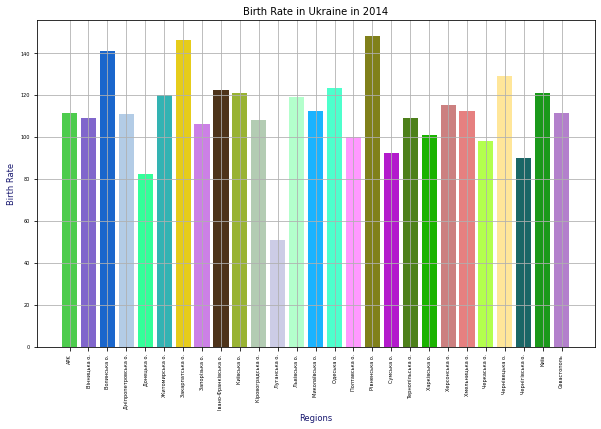

In [21]:
year_14 = df["2014"]
regions = df["регіон"]


def clean_region(regs: list):
    result = []
    for reg in regs:
        if reg == "Автономна Республіка Крим":
            reg = "APK"
            result.append(reg)
            continue
        if reg == "Севастополь (міськрада)":
            reg = "Севастополь"
            result.append(reg)
            continue
        name = reg.split(" ")[-1]
        if name == "область":
            name = "о."
            reg = f"{reg.split(' ')[0]} {name}"
            result.append(reg)
        else:
            result.append(reg)
    return result


regions = clean_region(df["регіон"])


def rgb_colors(arg: int):
    counter = 0
    result = []
    while counter < arg:
        random_color = (
            round(random.random(), 1),
            round(random.random(), 1),
            round(random.random(), 1),
        )
        result.append(random_color)
        counter += 1
    return result


colors = rgb_colors(len(regions))

plt.figure(figsize=(10, 6))
plt.bar(regions, year_14, color=colors)
plt.xticks(rotation=90)
plt.tick_params(axis="both", labelsize=5)
plt.title("Birth Rate in Ukraine in 2014", fontsize=10)
plt.xlabel("Regions", fontsize="small", color="midnightblue")
plt.ylabel("Birth Rate", fontsize="small", color="midnightblue")
plt.grid()
plt.show()

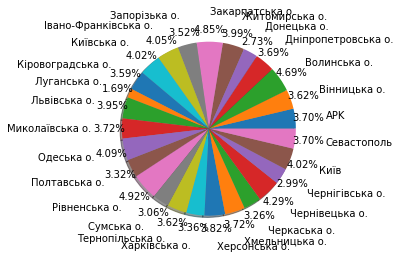

In [22]:
# Chart 1
plt.pie(
    year_14,
    labels=regions,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()
plt.close("all")